# Notes: Approach and Results

**Our Focus:** <br>
1. **Airbnb Listings (num) with a filter**: Maximum Person Capacity of Airbnb ≤ 2
2. **Find Average Price**
3. **Location Data**: Specifically, longitude and other relevant geographic markers.
4. **Wifi Availability**: Scouring through amenities to find listings that offered Wifi.
5. **Average Score of Reviews**: To gauge the experience of previous guests.



**Our Results:**

- AirBnbs in total: 21337
- AirBnBs that have only Person Capacity <= 2 = 7840
- For Person Capacity AirBnbs Wifi exists 7640 (so 200 locations missing Wifi)
- The average price of an Airbnb listing in the dataset is $94.20(Before making corrections, the dataset included some inaccurate figures. Specifically, one entry erroneously listed an apartment price as 65,000, which skewed the overall data. With these incorrect values, the average price was initially calculated to be 105 Dollars. Example for 65k https://www.airbnb.com/rooms/748361579995101465?source_impression_id=p3_1694960490_LcnZwtqSGq9CwfI7)
- Highest Price for an appartment is 1162.0
- The Average Review Score Rating in the dataset is 4.60
- There are 1145 missing values in the 'review_scores_value' column.
- 'Dedicated workspace' appears in 2873 rows.




**Next steps:**
- For a more accurate analysis, we also removed rows where both the review score and Wi-Fi information were missing. This step was necessary because we needed these values to calculate an attractiveness score.

**Result after dropping also reviews:**
- The new shape of the filtered dataframe is (6690, 75). (after dropping missing reviews)
- accomadtes types ( for 2  = 5884; for 1 = 806)
- The average price of an Airbnb listing in the dataset is $88.24
- Highest Price for an appartment is 1000.0
- Having wifi 6.558
- The Average Review Score Rating in the dataset is 4.61
- 'Dedicated workspace' appears in 2500 rows.
- appartment with 2 cap = 5584, with 1 cap = 806




# Import Data and Packages



**Import Packages** <br>
Pandas and numPy <br>






In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas as gpd
import math
from datetime import datetime as dt
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go


**Upload csv file** <br>
Upload from local drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Lisbon Data/"
df_lisbon = pd.read_csv(path + "listings2.csv")
df_coworking = pd.read_csv(path + "modified_coordinates.csv")
df_neighbourhoods = pd.read_csv(path + "neighbourhoods.csv")
# Dataset is now stored in a Pandas Dataframe

neighbourhoods_geojson = gpd.read_file(path + "neighbourhoods.geojson")


# Data Overview

**Generate Summaries** <br>
First, we look at the document's head and tail to see what fields exist and get a quick view of how the data looks.

Some immediate takeaways include:

*   Some values show NaN
* Some fields contain HTML


In [ ]:
df_lisbon.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,198480,https://www.airbnb.com/rooms/198480,20230612205741,2023-06-13,city scrape,Rental unit in Lisboa · ★4.65 · 1 bedroom · 2 ...,"The apartment is located at Alta de Lisboa, a ...","Alta de Lisboa borned from a municipal idea, i...",https://a0.muscache.com/pictures/80636745-dc19...,640147,...,4.84,4.36,4.61,61599/AL.,f,1,1,0,0,0.45
1,199461,https://www.airbnb.com/rooms/199461,20230612205741,2023-06-13,city scrape,Rental unit in Lisboa · ★4.92 · 2 bedrooms · 3...,"Romantic apartment Fully equipped, well decora...","The BAIXA (down town, lower area) neighbourhoo...",https://a0.muscache.com/pictures/prohost-api/H...,914126,...,4.92,4.96,4.86,114187/AL,f,16,16,0,0,1.23
2,6499,https://www.airbnb.com/rooms/6499,20230612205741,2023-06-13,city scrape,Rental unit in Lisbon · ★4.51 · 1 bedroom · 3 ...,"This apartment is all about Location, next to ...","To get to the city center, tram 15 stops in f...",https://a0.muscache.com/pictures/6422ee92-c84e...,14455,...,4.92,4.78,4.40,NaN,t,1,1,0,0,0.48
3,25659,https://www.airbnb.com/rooms/25659,20230612205741,2023-06-13,city scrape,Rental unit in Lisboa · ★4.80 · 1 bedroom · 1 ...,The most picturesque and charming neighborhood...,Alfama is the oldest and most picturesque quar...,https://a0.muscache.com/pictures/miso/Hosting-...,107347,...,4.95,4.89,4.82,56539/AL.,t,1,1,0,0,1.65
4,393699,https://www.airbnb.com/rooms/393699,20230612205741,2023-06-13,city scrape,Rental unit in Lisboa · ★4.61 · 3 bedrooms · 3...,<b>The space</b><br />This is a great newly re...,NaN,https://a0.muscache.com/pictures/4669286/03603...,1593947,...,4.78,4.94,4.66,NaN,f,12,8,4,0,1.10


In [ ]:
df_lisbon.tail()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
21332,910228145346064123,https://www.airbnb.com/rooms/910228145346064123,20230612205741,2023-06-13,city scrape,Rental unit in Cascais · ★New · 1 bedroom · 1 ...,"Bright apartment in an upscale area, perfect f...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,5091528,...,NaN,NaN,NaN,142789/AL,t,1,1,0,0,NaN
21333,910258063628503689,https://www.airbnb.com/rooms/910258063628503689,20230612205741,2023-06-13,city scrape,Home in Lisboa · ★New · 3 bedrooms · 4 beds · ...,Lisbon Soul Apartments está situado numa das z...,Mouraria é um dos mais tradicionais bairros da...,https://a0.muscache.com/pictures/miso/Hosting-...,38143780,...,NaN,NaN,NaN,48023/AL,f,3,3,0,0,NaN
21334,910317413432652834,https://www.airbnb.com/rooms/910317413432652834,20230612205741,2023-06-13,city scrape,Rental unit in Sacavém · ★New · 1 bedroom · 1 ...,"Quarto com cama de casal para 1 ou 2 pessoas, ...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,81894431,...,NaN,NaN,NaN,Exempt,f,1,0,1,0,NaN
21335,910337780841602854,https://www.airbnb.com/rooms/910337780841602854,20230612205741,2023-06-13,city scrape,Rental unit in Lisboa · ★New · 3 bedrooms · 5 ...,Garden Mills Apartment é um alojamento espaços...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,105229019,...,NaN,NaN,NaN,29371/AL,t,14,14,0,0,NaN
21336,910442772836012965,https://www.airbnb.com/rooms/910442772836012965,20230612205741,2023-06-13,city scrape,Rental unit in Queluz · ★New · 1 bedroom · 1 b...,Esqueça as suas preocupações neste espaço sere...,NaN,https://a0.muscache.com/pictures/262ce9ba-ff4c...,326522893,...,NaN,NaN,NaN,Exempt,f,4,1,2,1,NaN


In [ ]:
# (21337, 75)
df_lisbon.shape

(21337, 75)

We can get an idea of the data types for the various fields with the info() method which prints a summary of the dataframe. This summary includes:

* Field(column) name
* The number of non-null values
* The field datatype

In [ ]:
df_lisbon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21337 entries, 0 to 21336
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            21337 non-null  int64  
 1   listing_url                                   21337 non-null  object 
 2   scrape_id                                     21337 non-null  int64  
 3   last_scraped                                  21337 non-null  object 
 4   source                                        21337 non-null  object 
 5   name                                          21337 non-null  object 
 6   description                                   21315 non-null  object 
 7   neighborhood_overview                         12978 non-null  object 
 8   picture_url                                   21337 non-null  object 
 9   host_id                                       21337 non-null 

A common method to start with is describe() which generates descriptive statistics. This method may be more appropriate for other datasets but still provides some interesting stats that gets us a little more familiar with the data.

For instance, values like id, scrape_id, host_id,

------------

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

Generate descriptive statistics.

Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [ ]:
df_lisbon.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.133700e+04,2.133700e+04,2.133700e+04,21337.000000,21337.000000,21337.000000,21337.000000,21337.000000,0.0,16844.000000,...,18663.000000,18662.000000,18663.000000,18663.000000,18664.000000,21337.000000,21337.000000,21337.000000,21337.000000,18697.000000
mean,2.239296e+17,2.023061e+13,1.581966e+08,31.157520,50.275296,38.761233,-9.209023,3.934339,NaN,1.918606,...,4.676422,4.763892,4.776790,4.709391,4.565103,17.040962,14.071660,2.752871,0.109247,1.526782
std,3.484073e+17,0.000000e+00,1.623812e+08,131.994815,355.568300,0.111496,0.114092,2.405030,NaN,1.388398,...,0.411246,0.369019,0.357585,0.345170,0.429863,42.121197,41.249231,7.945463,0.908350,1.492832
min,6.499000e+03,2.023061e+13,1.405900e+04,1.000000,1.000000,38.676449,-9.487890,0.000000,NaN,1.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.915450e+07,2.023061e+13,1.930659e+07,2.000000,2.000000,38.710920,-9.298020,2.000000,NaN,1.000000,...,4.570000,4.710000,4.710000,4.610000,4.450000,1.000000,1.000000,0.000000,0.000000,0.430000
50%,3.634687e+07,2.023061e+13,9.332120e+07,5.000000,6.000000,38.718170,-9.147372,4.000000,NaN,2.000000,...,4.790000,4.870000,4.890000,4.800000,4.670000,4.000000,2.000000,0.000000,0.000000,1.080000
75%,6.231084e+17,2.023061e+13,2.553628e+08,17.000000,20.000000,38.744850,-9.134855,5.000000,NaN,2.000000,...,4.930000,4.970000,4.980000,4.920000,4.810000,14.000000,9.000000,2.000000,0.000000,2.210000
max,9.122303e+17,2.023061e+13,5.194735e+08,2815.000000,8982.000000,39.302130,-8.862850,16.000000,NaN,43.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,312.000000,306.000000,73.000000,18.000000,45.590000


In [ ]:
# Set the display option to show all columns
#pd.set_option('display.max_columns', None)

# If a column has at least one missing value, the corresponding value in the Series will be True, otherwise it will be False.
print(df_lisbon.isna().any())

# To count the number of True and False values in the Series returned
print(df_lisbon.isna().any().value_counts())


id                                              False
listing_url                                     False
scrape_id                                       False
last_scraped                                    False
source                                          False
                                                ...  
calculated_host_listings_count                  False
calculated_host_listings_count_entire_homes     False
calculated_host_listings_count_private_rooms    False
calculated_host_listings_count_shared_rooms     False
reviews_per_month                                True
Length: 75, dtype: bool
False    49
True     26
dtype: int64


In [ ]:
#check for duplicates
print(df_lisbon.duplicated())

# To count the number of True and False values in the Series returned
print(df_lisbon.duplicated().value_counts())

0        False
1        False
2        False
3        False
4        False
         ...  
21332    False
21333    False
21334    False
21335    False
21336    False
Length: 21337, dtype: bool
False    21337
dtype: int64


# Prepare Data

In [ ]:
# check price column
print(df_lisbon['price'])
print(df_lisbon['price'].isna().sum())
print(df_lisbon['price'].dtype)

0         $60.00
1        $207.00
2         $79.00
3         $94.00
4         $30.00
          ...   
21332    $149.00
21333    $154.00
21334    $324.00
21335    $514.00
21336     $40.00
Name: price, Length: 21337, dtype: object
0
object


In [ ]:
# delete dollar type and change the dtype from object to float
# create a copy of the dataset
df_lisbon_clean = df_lisbon.copy()
df_lisbon_clean['price'] = df_lisbon_clean['price'].str.replace('$', '').str.replace(',', '').astype(float)

<ipython-input-13-b7fbd914eda3>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_lisbon_clean['price'] = df_lisbon_clean['price'].str.replace('$', '').str.replace(',', '').astype(float)


In [ ]:
# check price column for df_lisbon_clean
print(df_lisbon_clean['price'])
print(df_lisbon_clean['price'].isna().sum())
print(df_lisbon_clean['price'].dtype)

0         60.0
1        207.0
2         79.0
3         94.0
4         30.0
         ...  
21332    149.0
21333    154.0
21334    324.0
21335    514.0
21336     40.0
Name: price, Length: 21337, dtype: float64
0
float64


**Drop accommodates <= 2**

In [ ]:
# we decided on accommodates <= 2

filtered_df = df_lisbon_clean[df_lisbon_clean['accommodates'] <= 2]
print(filtered_df['price'])

0         60.0
4         30.0
11       100.0
17       100.0
18        30.0
         ...  
21326     26.0
21330     70.0
21331     70.0
21334    324.0
21336     40.0
Name: price, Length: 7840, dtype: float64


**Drop **Text fett markieren** empty Reviews**

In [ ]:
# Drop rows where 'review_scores_value' is missing
filtered_df = filtered_df.dropna(subset=['review_scores_value'])

# Reset the index after dropping rows
filtered_df.reset_index(drop=True, inplace=True)

# Check the new shape of the dataframe
print(f"The new shape of the filtered dataframe is {filtered_df.shape}.")


The new shape of the filtered dataframe is (6695, 75).


# Data Analyze

Check average price

- The average price of an Airbnb listing in the dataset is $105.74

Check highest price

- The highest price of an Airbnb listing in the dataset is $65100.0

- Something is wrong with the data, so I checked for all rows price > 1000

- I started it with > 5000 an approach slowly to the value that was correct

- -> 6 rows are wrong and the airbnbs are not bookable (example https://www.airbnb.de/rooms/28506889?_set_bev_on_new_domain=1692813200_NGVmM2MyNzJjZDA0&source_impression_id=p3_1692813821_4pryoPL9nhKSyU7l, this one for 65k https://www.airbnb.com/rooms/748361579995101465?source_impression_id=p3_1694960490_LcnZwtqSGq9CwfI7)

After droping also empty reviews:
- The average price of an Airbnb listing in the dataset is $100.51

In [ ]:
average_price = filtered_df['price'].mean()
print(f"The average price of an Airbnb listing in the dataset is ${average_price:.2f}")

#----- price higher 1000 per night
# Filter rows where price is greater than 1000
rows_with_price_above_1000 = filtered_df[filtered_df['price'] > 1000]

# Print the rows
print(rows_with_price_above_1000)
# Print the rows along with their prices
print(rows_with_price_above_1000[['price']])

#---- drop the high price row 65k
# Find the indices of rows where price is greater than 2000
indices_to_remove = filtered_df[filtered_df['price'] > 2000].index

# Drop those rows from the DataFrame
filtered_df.drop(indices_to_remove, inplace=True)
#----
average_price = filtered_df['price'].mean()
print(f"The average price of an Airbnb listing in the dataset is ${average_price:.2f}")




The average price of an Airbnb listing in the dataset is $100.51
                      id                                      listing_url  \
304              3195705             https://www.airbnb.com/rooms/3195705   
541              6012511             https://www.airbnb.com/rooms/6012511   
2630            28506889            https://www.airbnb.com/rooms/28506889   
5886  748361579995101465  https://www.airbnb.com/rooms/748361579995101465   
6386  853593324594380110  https://www.airbnb.com/rooms/853593324594380110   

           scrape_id last_scraped           source  \
304   20230612205741   2023-06-13      city scrape   
541   20230612205741   2023-06-13      city scrape   
2630  20230612205741   2023-06-13      city scrape   
5886  20230612205741   2023-06-13  previous scrape   
6386  20230612205741   2023-06-13      city scrape   

                                                   name  \
304   Rental unit in Lisboa · ★4.41 · 1 bedroom · 1 ...   
541   Rental unit in Lisboa ·

In [ ]:
#min and max price
# Check if there are any listings in df_lisbon with a price of 0 dollars
zero_dollar_listings = filtered_df[filtered_df['price'] == 0]
zero_dollar_listings_count = zero_dollar_listings.shape[0]
print(f"Number of zero listings {zero_dollar_listings_count}")

# Find the highest price and corresponding Airbnb listing
highest_price_row = filtered_df[filtered_df['price'] == filtered_df['price'].max()]

# Get the URL of the Airbnb listing with the highest price
highest_price_url = highest_price_row['listing_url'].iloc[0]
highest_price_value = highest_price_row['price'].iloc[0]

print(f"The highest price in the dataset is ${highest_price_value}.")
print(f"The URL of the Airbnb listing with the highest price is {highest_price_url}.")


# Sort the dataset by the 'price' column and reset the index
sorted_prices = filtered_df.sort_values('price').reset_index(drop=True)

# Check if we have at least two entries
if sorted_prices.shape[0] >= 2:
    # Get the lowest and second lowest prices
    lowest_price = sorted_prices['price'].iloc[0]
    second_lowest_price = sorted_prices['price'].iloc[1]

    # Get the URLs of the Airbnb listings with the lowest and second lowest prices
    lowest_price_url = sorted_prices['listing_url'].iloc[0]
    second_lowest_price_url = sorted_prices['listing_url'].iloc[1]

    print(f"The lowest price in the dataset is ${lowest_price}.")
    print(f"The URL of the Airbnb listing with the lowest price is {lowest_price_url}.")
    print(f"The second lowest price in the dataset is ${second_lowest_price}.")
    print(f"The URL of the Airbnb listing with the second lowest price is {second_lowest_price_url}.")
else:
    print("The dataset does not have enough entries to determine the lowest and second lowest prices.")


# Get the index of the row with the highest price
index_of_max_price = filtered_df['price'].idxmax()

# Retrieve the row using the index
row_with_max_price = filtered_df.loc[index_of_max_price]

# Print the row
print(row_with_max_price)

Number of zero listings 0
The highest price in the dataset is $1000.0.
The URL of the Airbnb listing with the highest price is https://www.airbnb.com/rooms/30227351.
The lowest price in the dataset is $10.0.
The URL of the Airbnb listing with the lowest price is https://www.airbnb.com/rooms/29646978.
The second lowest price in the dataset is $10.0.
The URL of the Airbnb listing with the second lowest price is https://www.airbnb.com/rooms/888340581993130470.
id                                                                           30227351
listing_url                                     https://www.airbnb.com/rooms/30227351
scrape_id                                                              20230612205741
last_scraped                                                               2023-06-13
source                                                                    city scrape
                                                                ...                  
calculated_host_listin

I want to check the coloumn 'amenities' for the data type and get one sample of the entry

In [ ]:
column_type = filtered_df['amenities'].dtype
print(f"Data type of 'amenities': {column_type}")

sample_entry = filtered_df['amenities'].iloc[0]  # This gets the first entry, but you can choose any index
print(f"Sample entry from 'amenities': {sample_entry}")

Data type of 'amenities': object
Sample entry from 'amenities': ["Iron", "Dedicated workspace", "Host greets you", "First aid kit", "Wifi", "Kitchen", "Washer", "Hair dryer", "Essentials", "Fire extinguisher", "Backyard", "Refrigerator", "Oven", "Pocket wifi", "Hot water", "Elevator", "Cooking basics", "Microwave", "Coffee maker", "Heating", "Extra pillows and blankets", "Stove", "Cleaning available during stay", "Free street parking", "Bed linens", "Long term stays allowed", "TV with standard cable", "Smoking allowed", "Dishes and silverware", "Dishwasher", "Hangers"]


I want to count how often Wifi is included in the listings.

- 'Wifi' or 'wifi' appears in 6558 rows.


In [ ]:
# Count the number of times 'wifi' or 'Wifi' appears in the 'amenities' column
wifi_count = filtered_df['amenities'].apply(lambda x: 'Wifi' in x or 'wifi' in x).sum()
print(f"'Wifi' or 'wifi' appears in {wifi_count} rows.")

'Wifi' or 'wifi' appears in 6558 rows.


I want to count how often "Dedicated workspace" is included in the listings.

- 'Dedicated workspace' appears in 2500 rows.



In [ ]:
# Count the number of times 'wifi' or 'Wifi' appears in the 'amenities' column
wifi_count = filtered_df['amenities'].apply(lambda x: 'Dedicated workspace' in x).sum()
print(f"'Dedicated workspace' appears in {wifi_count} rows.")

'Dedicated workspace' appears in 2500 rows.


Check the data type and sample row for column review_scores_rating

- Calculate average review score: The average review score rating in the dataset is 4.61





In [ ]:
column_type = filtered_df['review_scores_value'].dtype
print(f"Data type of 'review_scores_value': {column_type}")

sample_entry = filtered_df['review_scores_rating'].iloc[0]  # This gets the first entry, but you can choose any index
print(f"Sample entry from 'review_scores_value': {sample_entry}")

average_score = filtered_df['review_scores_rating'].mean()
print(f"The average review score rating in the dataset is {average_score:.2f}")


# Check if there are missing values in the 'review_scores_value' column
missing_values = filtered_df['review_scores_value'].isna().sum()

if missing_values > 0:
    print(f"There are {missing_values} missing values in the 'review_scores_value' column.")
else:
    print("There are no missing values in the 'review_scores_value' column.")



Data type of 'review_scores_value': float64
Sample entry from 'review_scores_value': 4.65
The average review score rating in the dataset is 4.61
There are no missing values in the 'review_scores_value' column.


# Data Visu

**Distribution of Prices:**

Histogram: Plotting the distribution of prices can give insights into the range most listings are priced at.
Box Plot: Helps in identifying outliers and the interquartile range of prices.

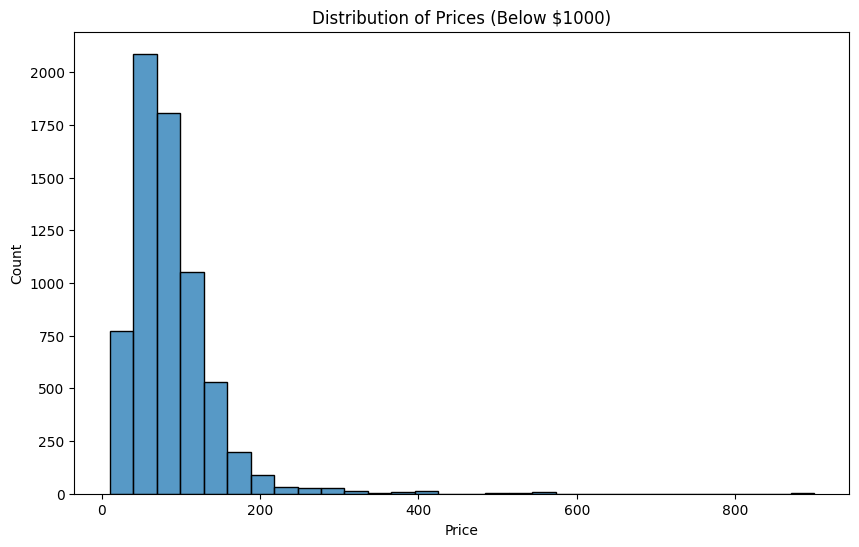

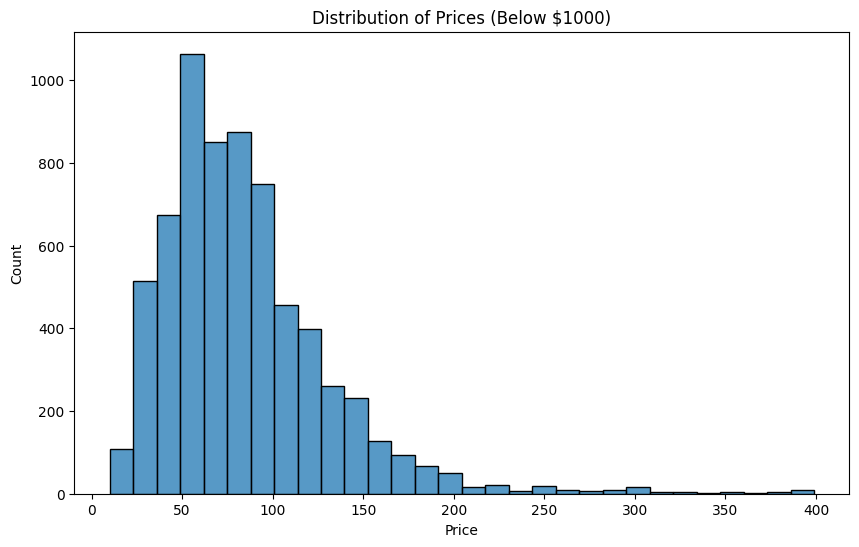

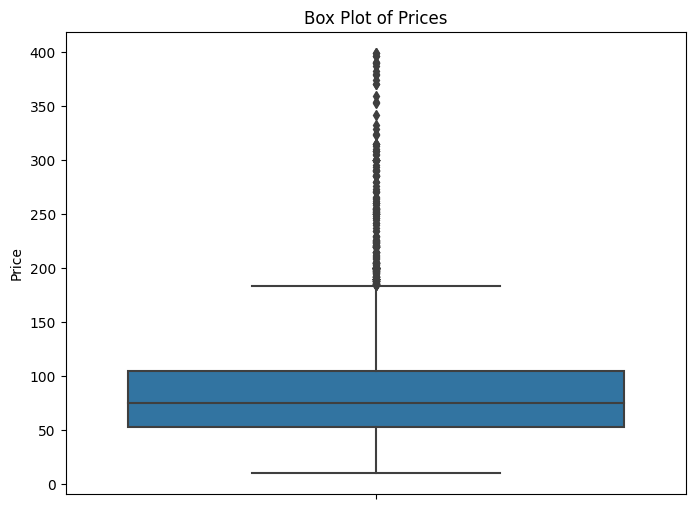

In [ ]:
#histogram plot
# Histogram (Considering listings with price below $1000):
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df[filtered_df['price'] < 1000]['price'], kde=False, bins=30)
plt.title('Distribution of Prices (Below $1000)')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# Histogram (Considering listings with price below $400):
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df[filtered_df['price'] < 400]['price'], kde=False, bins=30)
plt.title('Distribution of Prices (Below $1000)')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

#Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=filtered_df[filtered_df['price'] < 400]['price'])
plt.title('Box Plot of Prices')
plt.ylabel('Price')
plt.show()



**Distribution of Review Scores:**

Histogram: To see the distribution of review scores. It's interesting to note if most listings are highly rated.


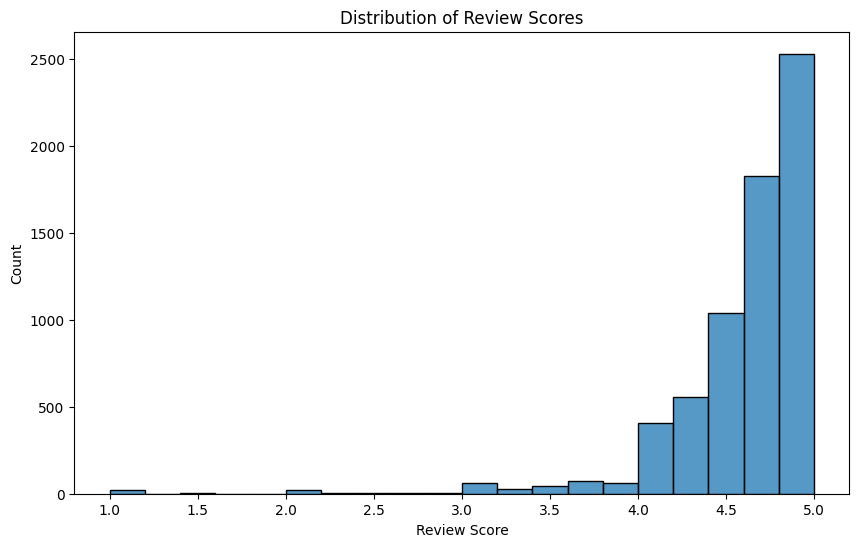

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['review_scores_rating'], kde=False, bins=20)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()




**Price vs. Review Score:**

Scatter Plot: Plotting price against review score can show if higher-rated properties also command higher prices.

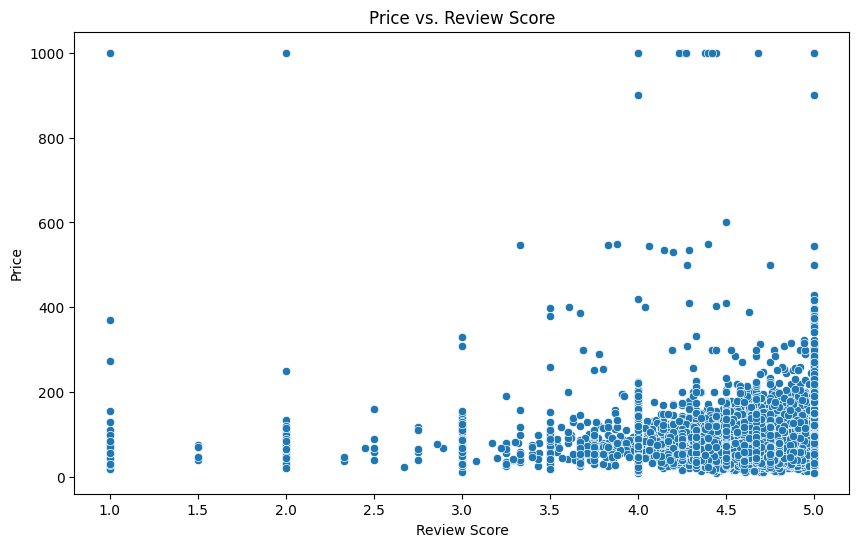

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_df['review_scores_rating'], y=filtered_df['price'])
plt.title('Price vs. Review Score')
plt.xlabel('Review Score')
plt.ylabel('Price')
plt.show()

**Determine the Proportion of Listings with Wifi:**

Firstly, determine how many listings have "Wifi" (or "wifi") in the amenities column and how many don't.

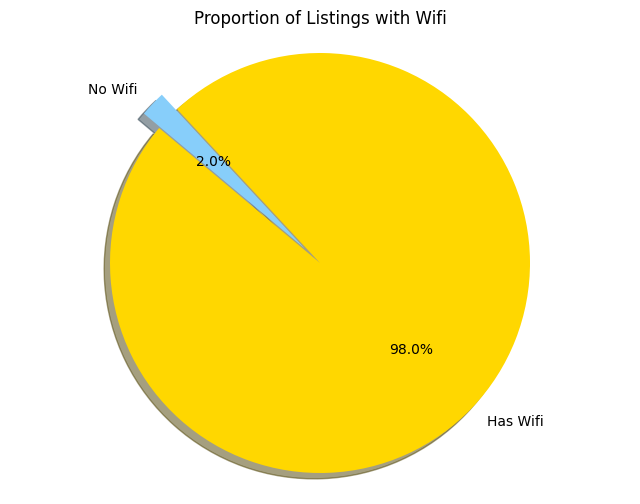

In [ ]:
# Check for presence of 'Wifi' or 'wifi' in 'amenities' column
wifi_present = filtered_df['amenities'].apply(lambda x: 'Wifi' in x or 'wifi' in x).sum()
wifi_not_present = len(filtered_df) - wifi_present


# Data to plot
labels = 'Has Wifi', 'No Wifi'
sizes = [wifi_present, wifi_not_present]
colors = ['gold', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice for emphasis

# Plot
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Listings with Wifi')
plt.show()


**Amenities:**

Bar Chart: Count of listings that offer certain amenities. This can show which amenities are most common and which are rare.

TODO: use this plot for other amenities

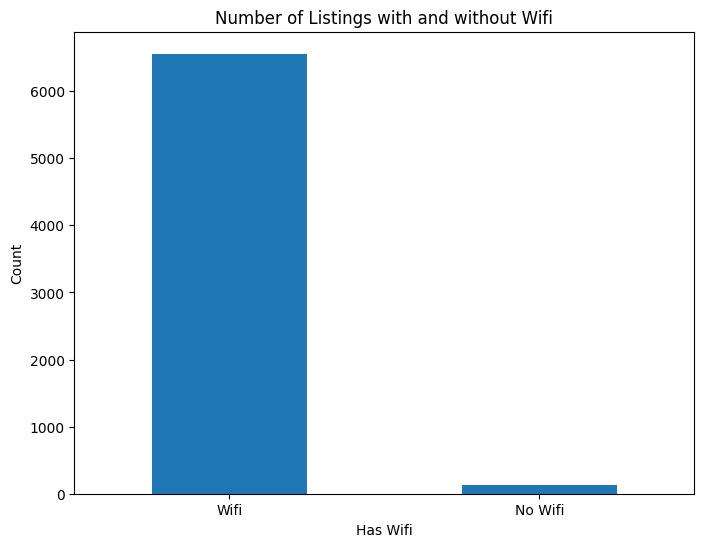

In [ ]:
has_wifi = filtered_df['amenities'].apply(lambda x: 'Wifi' in x or 'wifi' in x)
wifi_counts = has_wifi.value_counts()

plt.figure(figsize=(8, 6))
wifi_counts.plot(kind='bar')
plt.title('Number of Listings with and without Wifi')
plt.xlabel('Has Wifi')
plt.ylabel('Count')
plt.xticks([0, 1], ['Wifi', 'No Wifi'], rotation=0)
plt.show()


**Geographic Distribution of Listings:**

Geospatial Plot: With the latitude and longitude data, plot the listings on a map. Color-code them based on price or review scores. Correlation


In [ ]:
# Define a base map centered around the average latitude and longitude of your listings
map_center = [filtered_df['latitude'].mean(), filtered_df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# Add each listing to the map
for idx, row in filtered_df.iterrows():
    color = 'green'  # default color
    if row['review_scores_rating'] < 80:
        color = 'red'
    elif row['review_scores_rating'] < 90:
        color = 'blue'
    # else the color will be green for review scores >= 90

    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6
    ).add_to(m)

m.save('/content/drive/MyDrive/Lisbon Data/listings_map.html')




Correlation Heatmap:

Analyze the correlation between numeric variables such as price, review score, and any other numeric attributes you might have.


Listing Count Over Time:

If there's a date column indicating when the listing was added, a Time Series Plot can show the growth of Airbnb listings over time.


Price Distribution by Accommodation Type:

If you have data on the type of accommodation (e.g., entire home, private room), a Box Plot or Violin Plot can show the distribution of prices for each type.


Word Cloud:

If you have a description column, a word cloud can help identify frequently mentioned words or phrases in listing descriptions.
Reviews Over Time:

If there's a column indicating when a review was given, plotting the number of reviews over time can provide insights into the platform's activity or popularity peaks.

# Polygon Creating
With the dataset neighbourhoods.geojson
after creating the pologyn, we add this to our listings dataset (new colomun with pologyn name and the name is the neighbourhood group name)

To accomplish this, we can use spatial joins. A spatial join merges data based on spatial relationships, like containment or proximity. In this case, we would like to know which polygon (representing a neighbourhood group) contains each Airbnb listing, based on its latitude and longitude.

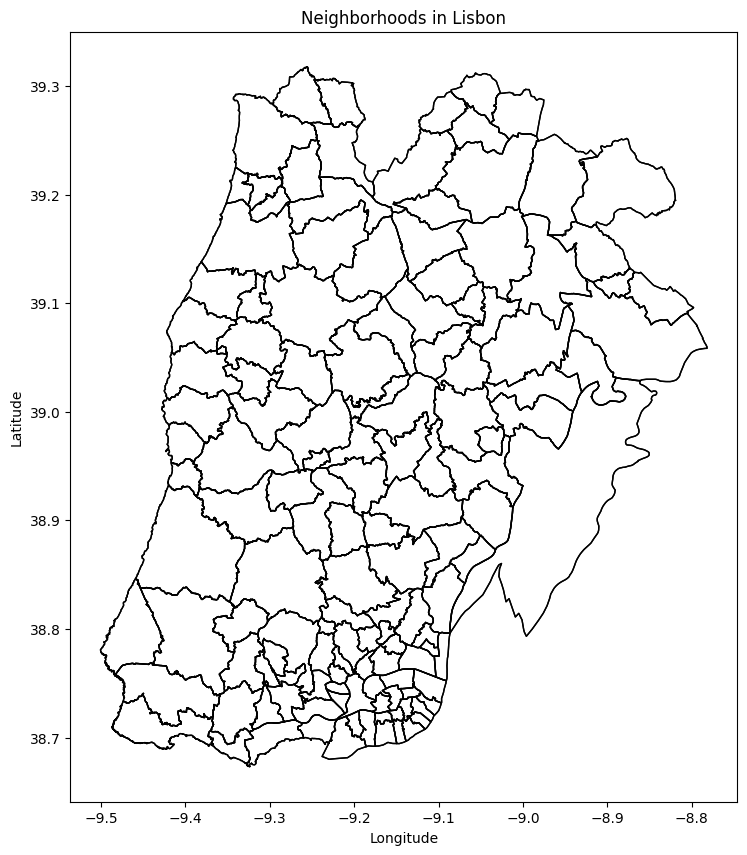

In [ ]:
# Plotting the polygons for each neighborhood
fig, ax = plt.subplots(figsize=(12, 10))
neighbourhoods_geojson.boundary.plot(ax=ax, linewidth=1, color='black')
neighbourhoods_geojson.plot(ax=ax, facecolor='none', edgecolor='k')
plt.title('Neighborhoods in Lisbon')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

<ipython-input-30-0916a6b3d034>:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(neighbourhoods_geojson.dissolve(by='neighbourhood_group').geometry.centroid.x,
<ipython-input-30-0916a6b3d034>:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  neighbourhoods_geojson.dissolve(by='neighbourhood_group').geometry.centroid.y,


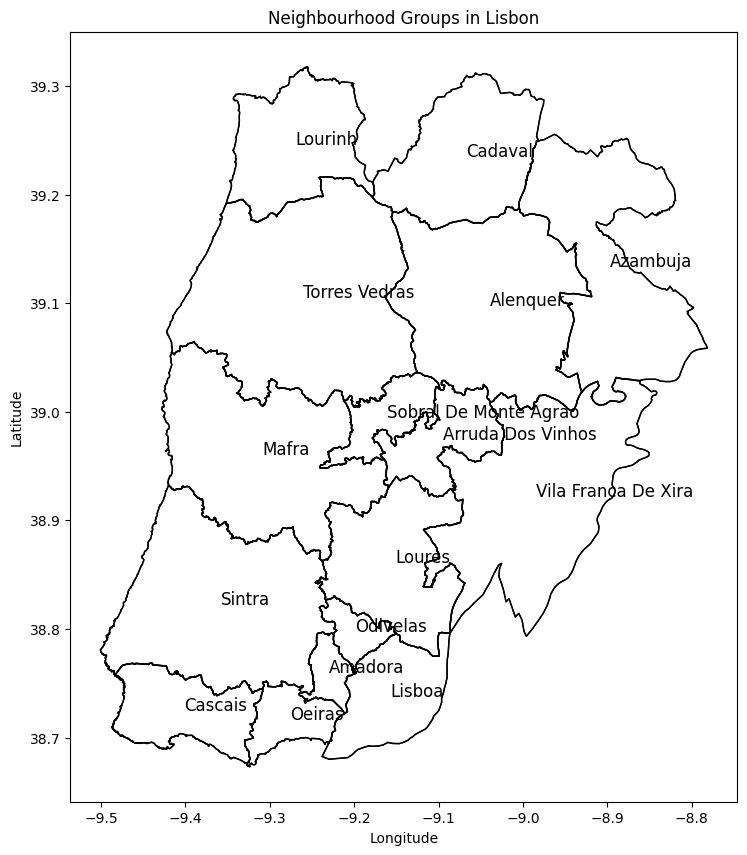

In [ ]:
# Plotting the polygons for each neighbourhood group
fig, ax = plt.subplots(figsize=(12, 10))
neighbourhoods_geojson.dissolve(by='neighbourhood_group').boundary.plot(ax=ax, linewidth=1, color='black')
neighbourhoods_geojson.dissolve(by='neighbourhood_group').plot(ax=ax, facecolor='none', edgecolor='k')

# Add labels for neighbourhood groups
for x, y, label in zip(neighbourhoods_geojson.dissolve(by='neighbourhood_group').geometry.centroid.x,
                       neighbourhoods_geojson.dissolve(by='neighbourhood_group').geometry.centroid.y,
                       neighbourhoods_geojson.dissolve(by='neighbourhood_group').index):
    ax.text(x, y, label, fontsize=12)

plt.title('Neighbourhood Groups in Lisbon')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


# Deeper Data Analyze
1. delete columns
2. check accomodates type (for one or two person)
3. check host_since
4. ceck host_is_superhost
5. price
6. amenities
7. coworking space data


### delete columns

In [ ]:
# List of columns to keep
columns_to_keep = [
    'id', 'listing_url', 'name', 'host_since', 'host_is_superhost',
    'neighbourhood_group_cleansed', 'accommodates', 'amenities', 'price',
    'number_of_reviews', 'review_scores_rating', 'latitude', 'longitude'
]

# Change DataFrame with only the specified columns
df_lisbon_filtered = filtered_df[columns_to_keep]

# Check the new shape and first few rows of the DataFrame
print(df_lisbon_filtered.columns)
print(f"The new shape of the filtered DataFrame is {df_lisbon_filtered.shape}.")
print(df_lisbon_filtered.head())

Index(['id', 'listing_url', 'name', 'host_since', 'host_is_superhost',
       'neighbourhood_group_cleansed', 'accommodates', 'amenities', 'price',
       'number_of_reviews', 'review_scores_rating', 'latitude', 'longitude'],
      dtype='object')
The new shape of the filtered DataFrame is (6690, 13).
       id                          listing_url  \
0  198480  https://www.airbnb.com/rooms/198480   
1  393699  https://www.airbnb.com/rooms/393699   
2  395874  https://www.airbnb.com/rooms/395874   
3   42519   https://www.airbnb.com/rooms/42519   
4  214729  https://www.airbnb.com/rooms/214729   

                                                name  host_since  \
0  Rental unit in Lisboa · ★4.65 · 1 bedroom · 2 ...  2011-05-29   
1  Rental unit in Lisboa · ★4.61 · 3 bedrooms · 3...  2012-01-11   
2  Rental unit in Lisbon · ★4.68 · 1 bedroom · 1 ...  2011-09-15   
3  Rental unit in Lisbon · ★4.48 · 1 bedroom · 1 ...  2010-06-01   
4  Rental unit in Lisbon · ★4.89 · 1 bedroom · 1 ...  20

### accommodates

In [ ]:
#Now lets check unique values of accommodates again
df_lisbon_filtered.accommodates.value_counts()

2    5884
1     806
Name: accommodates, dtype: int64

### host_since

In [ ]:
#Lets find the experince of host
df_lisbon_filtered.host_since

0       2011-05-29
1       2012-01-11
2       2011-09-15
3       2010-06-01
4       2011-09-04
           ...    
6690    2023-02-22
6691    2015-09-12
6692    2018-10-27
6693    2017-11-02
6694    2016-01-09
Name: host_since, Length: 6690, dtype: object

In [ ]:
# Lets change the datatype from object to datetime
df_lisbon_filtered.host_since=pd.to_datetime(df_lisbon_filtered.host_since)
df_lisbon_filtered.host_since.dt.year

0       2011
1       2012
2       2011
3       2010
4       2011
        ... 
6690    2023
6691    2015
6692    2018
6693    2017
6694    2016
Name: host_since, Length: 6690, dtype: int64

In [ ]:
#Now datetype is changed to float
#Create new column to verify no:of years of experience
df_lisbon_filtered['host_exp']=dt.today().year-df_lisbon_filtered.host_since.dt.year
df_lisbon_filtered.host_exp

0       12
1       11
2       12
3       13
4       12
        ..
6690     0
6691     8
6692     5
6693     6
6694     7
Name: host_exp, Length: 6690, dtype: int64

In [ ]:
#Verify if new column is added to the dataframe
df_lisbon_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6690 entries, 0 to 6694
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            6690 non-null   int64         
 1   listing_url                   6690 non-null   object        
 2   name                          6690 non-null   object        
 3   host_since                    6690 non-null   datetime64[ns]
 4   host_is_superhost             4006 non-null   object        
 5   neighbourhood_group_cleansed  6690 non-null   object        
 6   accommodates                  6690 non-null   int64         
 7   amenities                     6690 non-null   object        
 8   price                         6690 non-null   float64       
 9   number_of_reviews             6690 non-null   int64         
 10  review_scores_rating          6690 non-null   float64       
 11  latitude                      

In [ ]:
df_lisbon_filtered['host_exp'].mean()

6.412257100149477

###host_is_superhost

In [ ]:
df_lisbon_filtered.isna().sum()

id                                 0
listing_url                        0
name                               0
host_since                         0
host_is_superhost               2684
neighbourhood_group_cleansed       0
accommodates                       0
amenities                          0
price                              0
number_of_reviews                  0
review_scores_rating               0
latitude                           0
longitude                          0
host_exp                           0
dtype: int64

In [ ]:
#check unique values in this column including missing values
df_lisbon_filtered.host_is_superhost.value_counts(dropna=False)

f      2781
NaN    2684
t      1225
Name: host_is_superhost, dtype: int64

In [ ]:
#Since there are lot of missing values in this column
#Lets assume missing values as f
df_lisbon_filtered.host_is_superhost.fillna("f",inplace=True)#Since there are lot of missing values in this column
#Lets assume missing values as f
df_lisbon_filtered.host_is_superhost.fillna("f",inplace=True)

In [ ]:
df_lisbon_filtered.host_is_superhost.value_counts()

f    5465
t    1225
Name: host_is_superhost, dtype: int64

In [ ]:
#Alter f or t (strings) to 0 or 1 (integers)
df_lisbon_filtered['host_is_superhost']=df_lisbon_filtered.host_is_superhost.replace({'f':0, 't':1})

In [ ]:
df_lisbon_filtered.host_is_superhost.value_counts()

0    5465
1    1225
Name: host_is_superhost, dtype: int64

### price

In [ ]:
df_lisbon_filtered.price.describe()

count    6690.000000
mean       88.244395
std        69.605556
min        10.000000
25%        53.000000
50%        75.000000
75%       105.750000
max      1000.000000
Name: price, dtype: float64

In [ ]:
df_lisbon_filtered.price.describe()

count    6690.000000
mean       88.244395
std        69.605556
min        10.000000
25%        53.000000
50%        75.000000
75%       105.750000
max      1000.000000
Name: price, dtype: float64

### amenities

In [ ]:
#Create new column for wifi
df_lisbon_filtered['wifi']=(df_lisbon_filtered.amenities.str.contains('Wifi', case=False))

df_lisbon_filtered['wifi'].sum()/df_lisbon_filtered.shape[0]

#Create new column for workspace
df_lisbon_filtered['workspace']=(df_lisbon_filtered.amenities.str.contains('workspace', case=False))
df_lisbon_filtered['workspace'].sum()/df_lisbon_filtered.shape[0]

0.37369207772795215

### coworking place data

In [ ]:
#df_lisbon_filtered
# coworking dataset df_coworking
df_coworking.sample(5)
#Dataset includes data for all the cities

,city,name,adress,Google Plus-Code,longitude,latitude
130,Barcelona,Cloudworks Passeig de Gràcia,"Gran Via de les Corts Catalanes, 613, 1era pla...","95R9+49 Barcelona, Spanien",4139032,2168469
77,Lisbon,Unicorn Workspaces Avenidas Novas,"Av. António Augusto de Aguiar 21, 1050-012 Lis...","PRJX+9F Lissabon, Portugal",3873089,-915124
196,Barcelona,Coworking Loft para Creativos: WeLoft,"C/ de Pere IV, 78, 6º 2ª, 08005 Barcelona, Spa...","95WV+VF Barcelona, Spanien",4139716,2193665
6,Lisbon,Avila Spaces,"Praça Duque de Saldanha 1 2ºandar, 1050-094 Li...","PVM4+63 Lissabon, Portugal",3873311,-914479
181,Barcelona,Coworking Fontanella,"C/ de Fontanella, 18, 3º, 08010 Barcelona, Spa...","95QF+63 Barcelona, Spanien",4138804,2172710


In [ ]:
# lets Filter df_coworking data for lisbon and rename as df_coworking
# and Drop useless columns
# and Set index with name column
df_coworking_filtered=df_coworking[df_coworking.city=='Lisbon'].drop(['city', 'Google Plus-Code', 'adress'], axis=1).set_index('name')

# Count the number of rows in the DataFrame
num_rows = df_coworking_filtered.shape[0]

# Get the data types of each column
data_types = df_coworking_filtered.dtypes

print(f"The number of rows in the filtered DataFrame is {num_rows}.")
print(f"The data types of the columns are:\n{data_types}")


The number of rows in the filtered DataFrame is 88.
The data types of the columns are:
longitude    int64
latitude     int64
dtype: object


In [ ]:
# Adjust longitude and latitude in valid format
df_coworking_filtered.longitude=df_coworking_filtered.longitude/100000
df_coworking_filtered.latitude=df_coworking_filtered.latitude/1000000

In [ ]:
# Create a dictionnary dict_cwp for easy iteration
dict_cwp={df_coworking_filtered.index.tolist()[i] :(df_coworking_filtered.longitude.tolist()[i],df_coworking_filtered.latitude.tolist()[i]) for i in range(len(df_coworking_filtered.index.tolist()))}

Import functions for calculating distance from each listing to coworkingspace

In [ ]:
def distance(origin, destination):
    """
    Calculate the Haversine distance used for calculation between our dataset entries and coworking places.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [ ]:
def get_minimal_distance_from_coworking_place(l,L):
    """
    Get the minimal distance from co-working place listed in the dictionnary dict_cwp build on 'modified_coordinates.csv
    l for longitude
    L for latitude
    Result in km rounded with 3 digits
    """
    origin=(l,L)
    min_dist=""
    for df_coworking in dict_cwp:
        if min_dist=="":
            min_dist=distance(origin, dict_cwp[df_coworking])
            continue
        if min_dist<distance(origin, dict_cwp[df_coworking]):
            continue
        else:
            min_dist=distance(origin, dict_cwp[df_coworking])
    return round(min_dist,3)


In [ ]:
def get_number_of_coworking_place_less_than_n_km(l,L,n):
    """
    Get the number of co-working place listed in the dictionnary dict_cwp build on 'modified_coordinates.csv'
    within a radius of n kilometers
    l for longitude
    L for latitude
    n : float : lenght of radius within to check the number of co-working place
    Result is integer
    """
    origin=(l,L)
    count=0
    for df_coworking in dict_cwp:
        if distance(origin, dict_cwp[df_coworking])<=n:
            count+=1
    return count

In [ ]:
#Find the distance between each listing to the nearest cwp
df_lisbon_filtered['distance']=df_lisbon_filtered.apply(lambda x: get_minimal_distance_from_coworking_place(x.latitude,x.longitude), axis=1)

In [ ]:
df_lisbon_filtered.distance

0       712.911
1       712.910
2       713.048
3       713.073
4       712.602
         ...   
6690    726.324
6691    712.518
6692    712.913
6693    713.734
6694    717.394
Name: distance, Length: 6690, dtype: float64

In [ ]:
#75%of listings are ,500m away from ant cwp
#so lets say any listing which is 500m or less distance is considered attractive
df_lisbon_filtered.distance.describe()

count    6690.000000
mean      716.799815
std         8.841628
min       688.214000
25%       711.683250
50%       712.717000
75%       716.729000
max       742.069000
Name: distance, dtype: float64

In [ ]:
df_lisbon_filtered['count_of_cwp_0.5km']=df_lisbon_filtered.apply(lambda x: get_number_of_coworking_place_less_than_n_km(x.latitude,x.longitude,0.5), axis=1)

#Scoring

Create attractivness score

In [ ]:
df_lisbon_filtered.columns
columns=['price','host_exp','review_scores_rating','distance']

In [ ]:
quantiles = np.linspace(0.2, 1, 5)
quantiles

array([0.2, 0.4, 0.6, 0.8, 1. ])

In [ ]:
df_threshold = df_lisbon_filtered[columns].quantile(quantiles)
df_threshold = df_threshold.reset_index(drop = True)
df_threshold

,price,host_exp,review_scores_rating,distance
0,49.0,4.0,4.40,711.5380
1,66.0,6.0,4.64,712.2540
2,86.0,7.0,4.79,713.1574
3,115.0,9.0,4.93,724.0442
4,1000.0,13.0,5.00,742.0690


In [ ]:
def calc_attractiveness(
        data: pd.DataFrame,
        df_threshold: pd.DataFrame,
    ) -> pd.Series:

    for column in df_threshold.columns:
        for idx, threshold in enumerate(df_threshold[column]):
            if idx == 0:
                boolean_series = data[column] <= threshold
            else:
                boolean_series = data[column].between(
                    df_threshold.loc[idx-1, column],
                    df_threshold.loc[idx, column]
                )

            if f'{column} Score' not in data.columns:
                data[f'{column} Score'] = 8 # placeholder to create column
            data.loc[boolean_series, f'{column} Score'] = idx + 1

    return data

In [ ]:
#Create new df 'result'
result = calc_attractiveness(df_lisbon_filtered, df_threshold)
result.columns

Index(['id', 'listing_url', 'name', 'host_since', 'host_is_superhost',
       'neighbourhood_group_cleansed', 'accommodates', 'amenities', 'price',
       'number_of_reviews', 'review_scores_rating', 'latitude', 'longitude',
       'host_exp', 'wifi', 'workspace', 'distance', 'count_of_cwp_0.5km',
       'price Score', 'host_exp Score', 'review_scores_rating Score',
       'distance Score'],
      dtype='object')

In [ ]:
reverse_price_quantile = result['price Score'].map(lambda x: 5 - (x - 1))
reverse_distance_quantile = result['distance Score'].map(lambda x: 5 - (x - 1))
result['final score'] = 0.5 * reverse_price_quantile + 0.25 * result['review_scores_rating Score'] + 0.15 * reverse_distance_quantile + 0.1 * result['host_exp Score']
result['final score'] = 0.5 * reverse_price_quantile +  0.1 * result['host_exp Score'] + 0.15 * result['review_scores_rating']
result['final score'].describe()


count    6690.000000
mean        2.509204
std         0.718975
min         0.750000
25%         1.886625
50%         2.549750
75%         3.136375
max         3.750000
Name: final score, dtype: float64

In [ ]:
result.groupby(['neighbourhood_group_cleansed'])['final score'].agg(['min','mean','median','max']).style.background_gradient()

,min,mean,median,max
neighbourhood_group_cleansed,,,,
Alenquer,1.333500,2.719146,2.887500,3.494500
Amadora,1.350000,3.230854,3.318500,3.705000
Arruda Dos Vinhos,2.350000,2.383333,2.350000,2.450000
Azambuja,3.500500,3.517000,3.517000,3.533500
Cadaval,1.650000,2.286200,2.287750,3.736500
Cascais,1.200000,2.537511,2.552000,3.750000
Lisboa,0.750000,2.452313,2.420000,3.750000
Loures,1.387500,3.031268,3.251750,3.750000
Lourinh,1.200000,2.741034,2.850000,3.750000


In [ ]:
df_lisbon_filtered.columns

Index(['id', 'listing_url', 'name', 'host_since', 'host_is_superhost',
       'neighbourhood_group_cleansed', 'accommodates', 'amenities', 'price',
       'number_of_reviews', 'review_scores_rating', 'latitude', 'longitude',
       'host_exp', 'wifi', 'workspace', 'distance', 'count_of_cwp_0.5km',
       'price Score', 'host_exp Score', 'review_scores_rating Score',
       'distance Score', 'final score'],
      dtype='object')

In [ ]:
fig = go.Figure()

fig = ff.create_hexbin_mapbox(
    data_frame=result, lat="latitude", lon="longitude",width=1000, height=800,
    nx_hexagon=20, opacity=0.6, min_count=1,color='final score',agg_func=np.mean,
    color_continuous_scale="matter", range_color=[2,4],
    show_original_data=False,
    original_data_marker=dict(size=4, opacity=0.6, color="blue"))


fig.update_layout(mapbox_style="open-street-map")

fig.show()

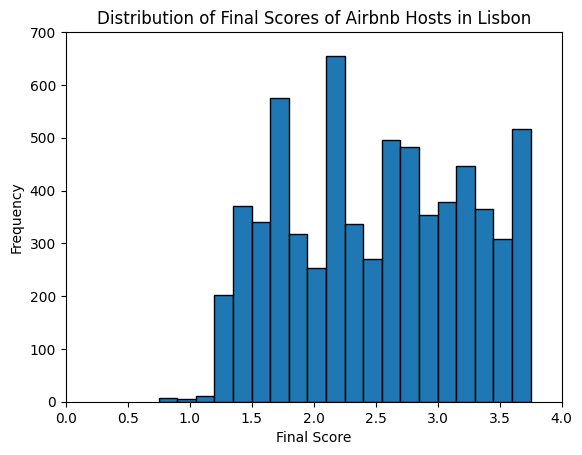

In [ ]:
final_scores = result['final score']

# Erstelle ein Histogramm
plt.hist(final_scores, bins=20, edgecolor='k')  # Du kannst die Anzahl der Bins anpassen

# Füge Beschriftungen hinzu
plt.xlabel('Final Score')
plt.ylabel('Frequency')
plt.title('Distribution of Final Scores of Airbnb Hosts in Lisbon')

plt.ylim(0, 700)
plt.xlim(0, 4)
# Zeige das Histogramm an
plt.show()

In [ ]:
fig = go.Figure()
fig = ff.create_hexbin_mapbox(
    data_frame=result, lat="latitude", lon="longitude",width=1000, height=800,
    nx_hexagon=20, opacity=0.6, min_count=1,color='final score',agg_func=np.mean,
    color_continuous_scale="matter",
    show_original_data=False,labels={"color":"Score"},
    original_data_marker=dict(size=4, opacity=0.6, color="blue"))
fig.update_layout(mapbox_style="open-street-map")
fig.show()